<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 6:  Web Scraping
### Finding Underpriced RVs on Craigslist

![](https://snag.gy/WrdUMx.jpg)

In this project we will be practicing our web scraping skills.  You can use Scrapy or Python requests in order to complete this project.  It may be helpful to write some prototype code in this notebook to test your assumptions, then move it into a Python file that can be run from the command line.

> In order to run code from the command line, instead of the notebook, you just need to save your code to a file (with a .py extension), and run it using the Python interpreter:<br><br>
> `python my_file.py`

You will be building a process to scrape a single category of search results on Craigslist, that can easily be applied to other categories by changing the search terms.  The main goal is to be able to target and scrape a single page given a set of parameters.

**If you use Scrapy, provide your code in a folder.**

## Import your libraries for scrapy / requests / pandas / numpy / etc
Setup whichever libraries you need. Review past material for reference.

In [1]:
# PREPARE REQUIRED LIBRARIES
import requests
from scrapy.selector import Selector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

plt.style.use('fivethirtyeight')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.  Scrape for the largest US cities (non-exhaustive list)
Search, research, and scrape Wikipedia for a list of the largest US cities.  There are a few sources but find one that is in a nice table.  We don't want all cities, just signifficant cities.  Examine your source.  Look for what can be differentiable.

- Use requests
- Build XPath query(ies)
- Extract to a list
- Clean your list

In [2]:
# SCRAPE WIKIPEDIA FOR LARGEST US CITIES (NON-EXHAUSTIVE LIST)
wiki = requests.get("https://simple.wikipedia.org/wiki/List_of_United_States_cities_by_population")

In [3]:
cities = Selector(text=wiki.text).xpath('//tr/td[2]/a/text()').extract()

In [4]:
cities = pd.DataFrame(cities[:10])

In [5]:
cities.rename(columns={0:'City'},inplace=True)

In [6]:
print cities

           City
0      New York
1   Los Angeles
2       Chicago
3       Houston
4  Philadelphia
5       Phoenix
6   San Antonio
7     San Diego
8        Dallas
9      San Jose


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1.2 Only retain cities with properly formed ASCII

Optionally, filter out any cities with impropper ASCII characters.  A smaller list will be easier to look at.  However you may not need to filter these if you spend more time scraping a more concise city list.  This list should help you narrow down the list of regional Craigslist sites.

In [7]:
# ONLY RETAIN PROPERLY FORMED CITIES WITH FILTERING FUNCTION


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.  Write a function to capture current pricing information via Craigslist in one city.
Choose a city from your scraped data, then go to the cooresponding city section on Craigslist, searching for "rv" in the auto section.  Write a method that pulls out the prices.

In [8]:
def rv_prices(url):
    html = requests.get(url)
    prices = Selector(text=html.text).xpath('//span[@class="l2"]/span[@class="price"]/text()').extract()
    prices = pd.DataFrame(prices)
    prices.rename(columns={0:'Prices'},inplace=True)
    print prices
rv_prices("http://philadelphia.craigslist.org/search/rva")

     Prices
0    $59999
1    $19995
2     $4200
3      $850
4    $10500
5   $109995
6     $5200
7     $3200
8     $6500
9     $6500
10    $5500
11   $16500
12    $2000
13   $23975
14    $6900
15   $16995
16    $4500
17   $10000
18    $9500
19   $15505
20  $118184
21   $17000
22    $8000
23    $8200
24    $7800
25    $9200
26   $19000
27     $499
28    $3000
29    $2000
..      ...
62    $9995
63   $29900
64   $28284
65   $40522
66   $87040
67   $37900
68   $39145
69   $36690
70   $46902
71    $6600
72      $20
73      $10
74  $153900
75   $67995
76   $49500
77   $52900
78   $39561
79   $23852
80   $86184
81   $86900
82   $45993
83   $15995
84   $33995
85    $2600
86   $13005
87     $250
88    $9400
89   $16500
90    $2080
91  $107772

[92 rows x 1 columns]


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2.1 Create a mapping of cities to cooresponding regional Craigslist URLs

Major US cities on Craigslist typically have their own cooresponding section (ie: SFBay Area, NYC, Boston, Miami, Seattle, etc).  Later, you will use these to query search results for various metropolitian regions listed on Craigslist.  Between the major metropolitan Craigslist sites, the only thing that will differ is the URL's that correspond to them.

The point of the "mapping":  Create a data structure that allows you to iterate with both the name of the city from Wikipedia, with the cooresponding variable that that will allow you to construct each craigslist URL for each region.

> For San Francsico (the Bay Area metropolitan area), the url for the RV search result is:
> http://sfbay.craigslist.org/search/sss?query=rv
>
> The convention is http://[region].craigslist.org/search/sss?query=rf
> Replacing [region] with the cooresponding city name will allow you to quickly iterate through each regional Craigslist site, and scrape the prices from the search results.  Keep this in mind while you build this "mapping".


In [9]:
mapping = {
    "New York":"newyork",
    "Los Angeles":"losangeles",
    "Chicago":"chicago",
    "Houston":"houston",
    "Philadelphia":"philadelphia",
    "Phoenix":"phoenix",
    "San Antonio":"sanantonio",
    "San Diego":"sandiego",
    "Dallas":"dallas",
    "San Jose":"sfbay"
}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Define a function to caculate mean and median price per city.

Now that you've created a list of cities you want to scrape, adapt your solution for grabbing data in one region site, to grab data for all regional sites that you collected, then calculate the mean and median price of RV results from each city.

> Look at the URLs from a few different regions (ie: portland, phoenix, sfbay), and find what they have in common.  Determine the area in the URL string that needs to change the least, and figure out how to replace only that portion of the URL in order to iterate through each city.

In [29]:
def city_prices(mapping):
    prices_vf = pd.DataFrame()
    for key in mapping:
        url = "http://%s.craigslist.org/search/rva" %(mapping[key])
        print url
        html = requests.get(url)
        prices = Selector(text=html.text).xpath('//span[@class="l2"]/span[@class="price"]/text()').extract()
        prices = pd.DataFrame(prices)
        prices.rename(columns={0:'Prices'},inplace=True)
        prices["City"] = key
        sequence = [prices_vf, prices] #concatenate needs to take in a list of dataframes to concat thus this sequence
        prices_vf = pd.concat(sequence) #concatenates the final table with each website's scraped prices
    prices_vf['Prices'] = prices_vf['Prices'].map(lambda x:float(x.strip('$'))) #strips the $ and converts into floats
    print prices_vf.groupby('City').agg(['mean','median'])
    return prices_vf

In [30]:
prices_df = city_prices(mapping)

http://dallas.craigslist.org/search/rva
http://houston.craigslist.org/search/rva
http://newyork.craigslist.org/search/rva
http://phoenix.craigslist.org/search/rva
http://losangeles.craigslist.org/search/rva
http://chicago.craigslist.org/search/rva
http://sfbay.craigslist.org/search/rva
http://sandiego.craigslist.org/search/rva
http://philadelphia.craigslist.org/search/rva
http://sanantonio.craigslist.org/search/rva
                    Prices         
                      mean   median
City                               
Chicago       18125.910448  14495.0
Dallas        41586.281690  24200.0
Houston       23750.546667  17995.0
Los Angeles   13480.462366   5995.0
New York      26954.963636  22995.0
Philadelphia  34193.678571  15750.0
Phoenix       20471.141304  17999.0
San Antonio   30670.987654  22850.0
San Diego     19312.732558  14791.5
San Jose      39955.634146  32946.5


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Run your scraping process, and save your results to a CSV file.

In [3]:
#export so we don't keep getting banned
prices_df.to_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 6/rv_prices.csv') 

In [4]:
prices_df = pd.read_csv('/home/llevin/Desktop/DSI-SF-2-llevin16/Projects/Project 6/rv_prices.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Do an analysis of the RV market.

Go head we'll wait.  Anything notable about the data?

In [5]:
#finds the 5th and 95th percentiles for the cleaning process
prices_tile = prices_df.groupby('City').quantile([.05,.95]).reset_index()

In [6]:
#only way I figured out how to remove any outlier prices within each city
def tile_clean(prices_tile,prices_df):
    prices_cleaned = pd.DataFrame()
    for city in prices_tile['City'].unique():
        temp1 = prices_tile[prices_tile['City']==city]
        bottom = temp1[temp1['level_1']==.05]['Prices'].values
        top = temp1[temp1['level_1']==.95]['Prices'].values
        temp2 = prices_df[prices_df['City']==city]
        temp2 = temp2[temp2['Prices']>bottom[0]]
        temp2 = temp2[temp2['Prices']<top[0]]
        sequence = [prices_cleaned,temp2]
        prices_cleaned = pd.concat(sequence)
    return prices_cleaned

prices_cleaned = tile_clean(prices_tile,prices_df)

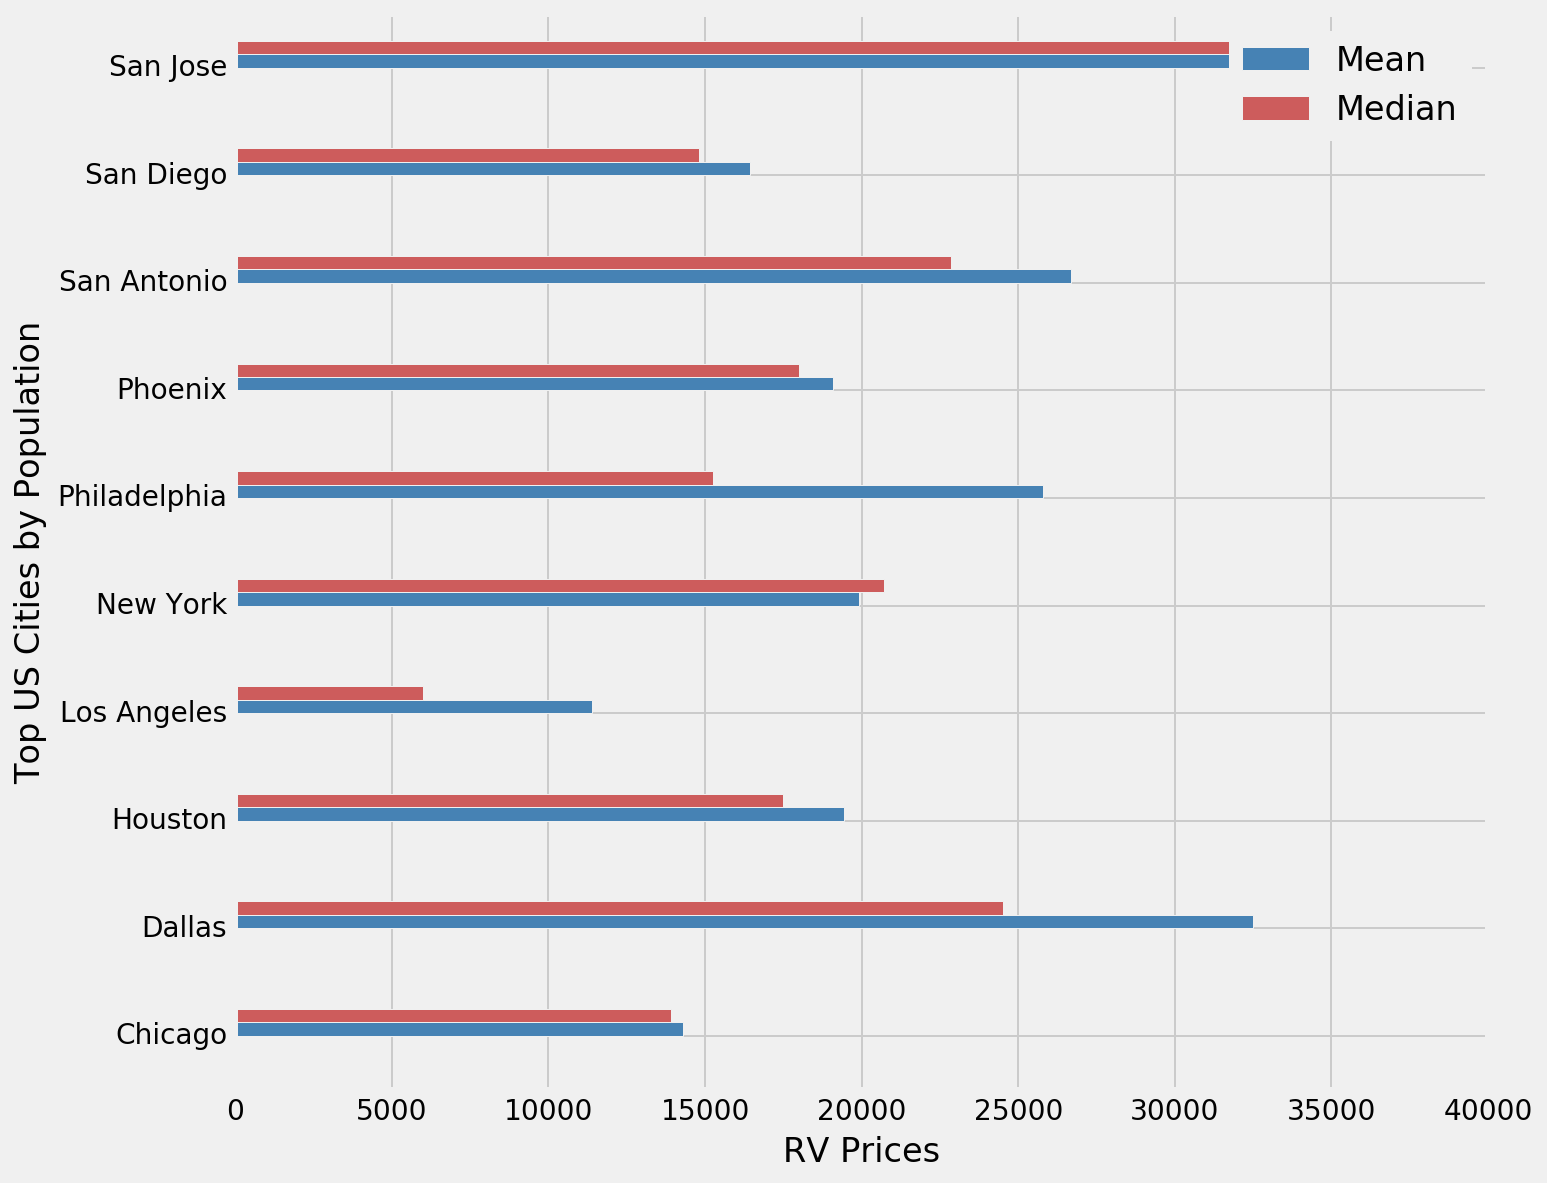

In [12]:
fig = plt.figure(figsize=(10,9))
ax = fig.gca()
prices_cleaned.groupby('City').agg(['mean','median']).plot.barh(ax=ax, color=['steelblue','indianred'])
ax.set_ylabel('Top US Cities by Population')
ax.set_xlabel('RV Prices')
ax.legend(['Mean','Median'])
plt.show()

In [13]:
y = prices_cleaned['City'].values
X = prices_cleaned[['Prices']].values

scale = StandardScaler()
Xn = scale.fit_transform(X)

print Xn.shape,y.shape

(688, 1) (688,)


In [14]:
# Setup our GridSearch Parmaters
search_parameters = {
    'n_neighbors':  range(1,101), 
    'weights':      ['uniform', 'distance']
}

# Intialize a blank model object
knn = KNeighborsClassifier()

# Initialize gridsearch
grid = GridSearchCV(knn, search_parameters, cv=5,verbose=1)
knn_best = grid.fit(Xn,y).best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed:    2.3s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


In [15]:
# Setup our GridSearch Parmaters
search_parameters = {
    'penalty':  ['l1','l2'],
    'solver':  ['liblinear']
}

# Intialize a blank model object
log = LogisticRegression()

# Initialize gridsearch
grid = GridSearchCV(log, search_parameters, cv=5, verbose=1)
log_best = grid.fit(Xn,y).best_estimator_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished


In [17]:
#Manual cross validation and results printing
cv_indices = StratifiedKFold(y, n_folds=5)

knn_scores = []
log_scores = []

for train,test in cv_indices:
    x_train = Xn[train,:]
    x_test = Xn[test,:]
    y_train = y[train]
    y_test = y[test]
    
    knn_best.fit(x_train,y_train)
    log_best.fit(x_train,y_train)
    
    knn_scores.append(knn_best.score(x_test,y_test))
    log_scores.append(log_best.score(x_test,y_test))

print knn_scores
print log_scores
print 'KNN Score: ',np.mean(knn_scores)
print 'Log Score: ',np.mean(log_scores)

[0.20422535211267606, 0.21985815602836881, 0.21897810218978103, 0.29629629629629628, 0.2932330827067669]
[0.11971830985915492, 0.15602836879432624, 0.20437956204379562, 0.17037037037037037, 0.18045112781954886]
KNN Score:  0.246518197867
Log Score:  0.166189547777


In [28]:
y_hat = knn_best.predict(Xn)

array([ 9800.])

In [73]:
predictions = pd.DataFrame({'Prices':X[:,0]})
predictions['Predicted City'] = y_hat
predictions['Actual City'] = y
predictions.head()

,Prices,Predicted City,Actual City
0,9800.0,Chicago,Chicago
1,10500.0,Chicago,Chicago
2,41500.0,Chicago,Chicago
3,21500.0,Chicago,Chicago
4,225.0,Chicago,Chicago


In [97]:
pred_a = predictions.groupby('Actual City').mean().reset_index()
pred_p = predictions.groupby('Predicted City').mean().reset_index()

pred2 = pred_a.merge(pred_p,left_on='Actual City',right_on='Predicted City')
pred2 = pred2.ix[:,['Actual City','Prices_x','Prices_y']]
pred2.rename(columns={'Actual City':'City','Prices_x':'Actual Mean','Prices_y':'Predicted Mean'},inplace=True)
pred2

,City,Actual Mean,Predicted Mean
0,Chicago,14307.406780,15086.724638
1,Dallas,32491.947368,32847.616667
2,Houston,19426.461538,19547.671429
3,Los Angeles,11404.156627,13298.938053
4,New York,19907.162791,21512.956522
5,Philadelphia,25802.500000,23390.468354
6,Phoenix,19078.841463,18821.035714
7,San Antonio,26675.710145,29899.821429
8,San Diego,16432.289474,18673.112903
9,San Jose,36712.125000,41652.673469


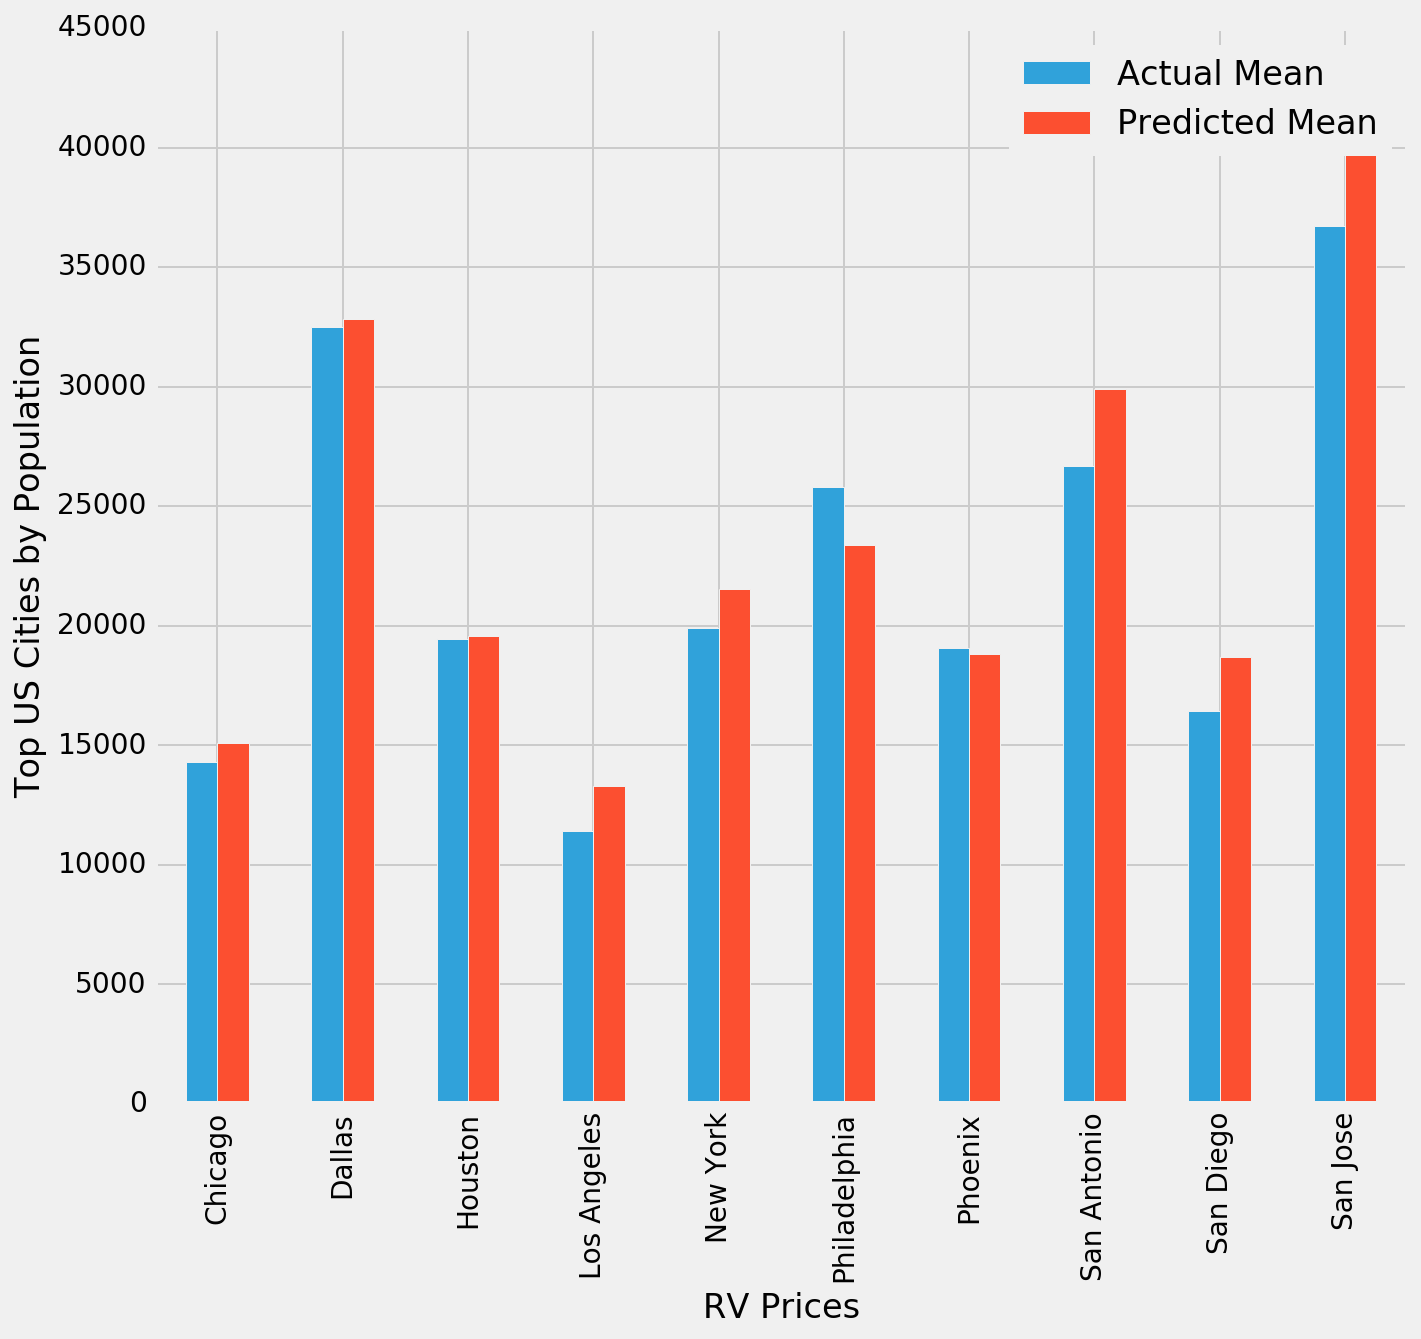

In [98]:
fig = plt.figure(figsize=(10,9))
ax = fig.gca()
pred2.plot.bar(x='City',ax=ax)
ax.set_ylabel('Top US Cities by Population')
ax.set_xlabel('RV Prices')
ax.legend(['Actual Mean','Predicted Mean'])
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Does it makes sense to buy RVs in one region and sell them in another?

Assuming the cost of shipping or driving from one regional market to another.

Looks like the best option within the data scraped is to buy in the LA region and sell in the SF/SJ region. In both the actual and predicted versions LA has the lowest average price/RV while San Jose (which is the SF bay area) has the highest average price. Also taking into account the travel time being much lower between LA and SJ versus other options (e.g. LA to Dallas), it seems like there is definitely an arbitrage opportunity. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.2 Can you pull out the "make" from the markup and include that in your analyis?
How reliable is this data and does it make sense?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.3 Are there any other variables you could pull out of the markup to help describe your dataset?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Move your project into scrapy (if you haven't used Scrapy yet)

>Start a project by using the command `scrapy startproject [projectname]`
> - Update your settings.py (review our past example)
> - Update your items.py
> - Create a spiders file in your `[project_name]/[project_name]/spiders` directory

You can update your spider class with the complete list of craigslist "start urls" to effectively scrape all of the regions.  Start with one to test.

Updating your parse method with the method you chose should require minimal changes.  It will require you to update your parse method to use the response parameter, and an item model (defined in items.py).

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7.  Chose another area of Craigslist to scrape.

**Choose an area having more than a single page of results, then scrape multiple regions, multiple pages of search results and or details pages.**

This is the true exercise of being able to understand how to succesffuly plan, develop, and employ a broader scraping strategy.  Even though this seems like a challenging task, a few tweeks of your current code can make this very managable if you've pieced together all the touch points.  If you are still confused as to some of the milestones within this process, this is an excellent opportunity to round out your understanding, or help you build a list of questions to fill in your gaps.

_Use Scrapy!  Provide your code in this project directory when you submit this project._